In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [133]:
import os
import numpy as np
import pandas as pd
import warnings
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro, kstest, pearsonr
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor

In [164]:
df = pd.read_csv('/content/drive/MyDrive/인지응/dataset.csv')


In [165]:
# 기타 성별 삭제
homo = df[df['gender'] == 'Other'].index
df = df.drop(homo)

In [168]:
# 카디널리티 2개인 변수들 라벨 인코딩
gen = df.gender.replace(to_replace={'Male':1,'Female':0})
mar = df.ever_married.replace(to_replace={'Yes':1,'No':0})
res = df.Residence_type.replace(to_replace={'Urban':1,'Rural':0})

In [169]:
df = df.drop(columns = 'ever_married')
df = df.drop(columns = 'gender')
df = df.drop(columns = 'Residence_type')
df = df.drop(columns = 'id')
df = pd.concat([gen, df], axis = 1)
df = pd.concat([mar, df], axis = 1)

In [170]:
# 결측치 확인
df.isna().sum()

ever_married             0
gender                   0
age                      0
hypertension             0
heart_disease            0
work_type                0
avg_glucose_level        0
bmi                   1458
smoking_status       13290
stroke                   0
dtype: int64

In [171]:
# 결측치 제거 / 대치
df = df.dropna(subset=['smoking_status'])
df= df.reset_index(drop=True)
def fillna_with_mode(df, column_name):
    mode_value = df[column_name].mode()[0]
    df[column_name].fillna(mode_value, inplace=True)


fillna_with_mode(df, 'bmi')

In [173]:
# 결측치 확인
df.isna().sum()

ever_married         0
gender               0
age                  0
hypertension         0
heart_disease        0
work_type            0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [175]:
# 카디널리티 3개이상 변수 원핫 인코딩
oh = pd.get_dummies(df[['work_type']])
oh2 = pd.get_dummies(df[['smoking_status']])
df = df.drop(columns = 'work_type')
df = df.drop(columns = 'smoking_status')
df = pd.concat([df,oh], axis = 1)
df = pd.concat([df,oh2], axis = 1)

<Axes: ylabel='age'>

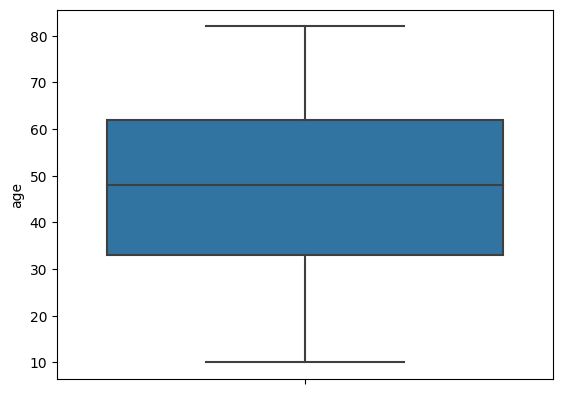

In [177]:
# 연속형 변수들 이상치 확인

import seaborn as sns

sns.boxplot(y = 'age', data= df)

<Axes: ylabel='avg_glucose_level'>

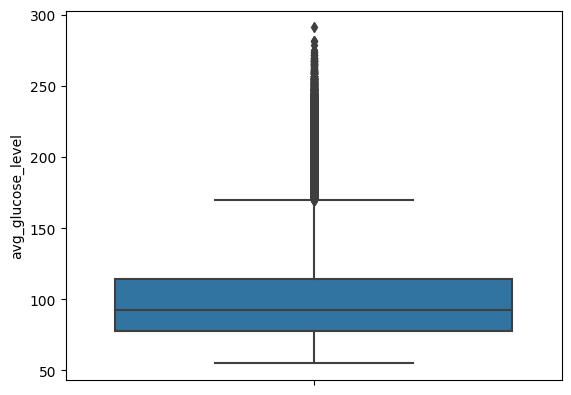

In [178]:
sns.boxplot(y = 'avg_glucose_level', data= df)

<Axes: ylabel='bmi'>

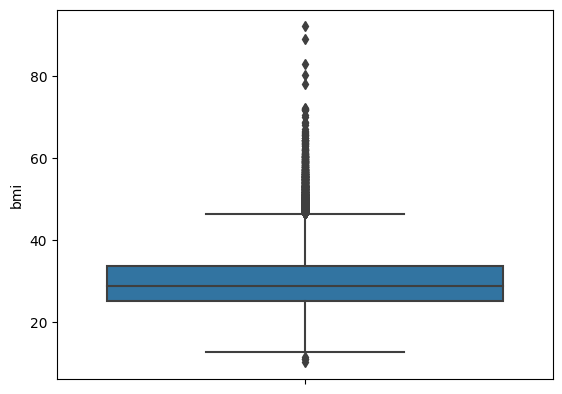

In [179]:
sns.boxplot(y = 'bmi', data= df)

In [188]:
# 이삳치 제거
df_num = ['age','avg_glucose_level','bmi']

def remove_outliers_iqr(df, columns, multiplier=1.5):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

columns_with_outliers = df_num
df_processed = remove_outliers_iqr(df, columns_with_outliers)
df = df_processed
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25310 entries, 0 to 30098
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ever_married                    25310 non-null  int64  
 1   gender                          25310 non-null  int64  
 2   age                             25310 non-null  float64
 3   hypertension                    25310 non-null  int64  
 4   heart_disease                   25310 non-null  int64  
 5   avg_glucose_level               25310 non-null  float64
 6   bmi                             25310 non-null  float64
 7   stroke                          25310 non-null  int64  
 8   work_type_Govt_job              25310 non-null  uint8  
 9   work_type_Never_worked          25310 non-null  uint8  
 10  work_type_Private               25310 non-null  uint8  
 11  work_type_Self-employed         25310 non-null  uint8  
 12  work_type_children              

<Axes: ylabel='avg_glucose_level'>

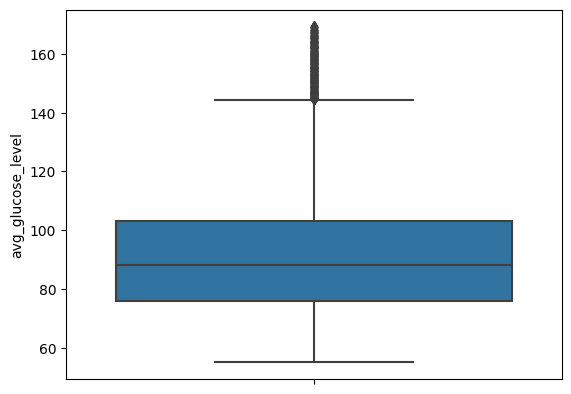

In [193]:
sns.boxplot(y = 'avg_glucose_level', data= df)

<Axes: ylabel='bmi'>

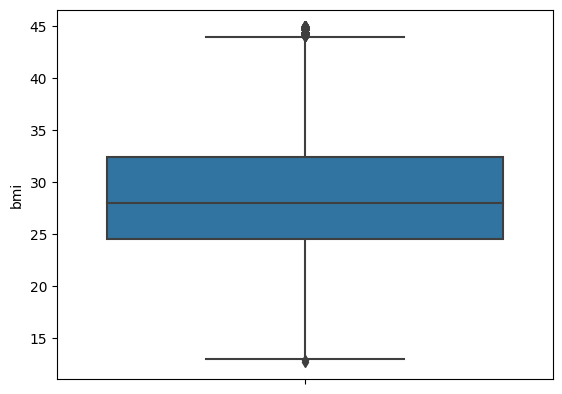

In [194]:
sns.boxplot(y = 'bmi', data= df)

In [197]:
df.to_csv('/content/drive/MyDrive/인지응/preprocessed.csv')